In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from collections import Counter
from optparse import OptionParser
import argparse
import matplotlib.pyplot as plt
import inspect
import seaborn as sns

## Достаём данные

In [55]:
b2 = '/home/taina/diploma/b2/myproject.proteinortho.tsv'
b = '/home/taina/diploma/b/myproject.proteinortho.tsv'
a_b1 = '/home/taina/diploma/a_b1/myproject.proteinortho.tsv'
diff1 = '/home/taina/diploma/ecolidiff1/myproject.proteinortho.tsv'
diff2 = '/home/taina/diploma/ecolidiff2/myproject.proteinortho.tsv'
abaumannii1 = '/home/taina/diploma/baumannii1/myproject.proteinortho.tsv'
abaumannii2 = '/home/taina/diploma/baumannii2/myproject.proteinortho.tsv'
t1 = '/home/taina/diploma/t1/myproject.proteinortho.tsv'
t2 = '/home/taina/diploma/t2/myproject.proteinortho.tsv'
t3 = '/home/taina/diploma/t3/myproject.proteinortho.tsv'
t4 = '/home/taina/diploma/t4/myproject.proteinortho.tsv'
t5 = '/home/taina/diploma/t5/myproject.proteinortho.tsv'

In [64]:
from collections import defaultdict

strain_counts = defaultdict(int)

with open(t3, 'r') as file:
    
    # Skip first line 
    next(file)
    
    for line in file:
        words = line.split("\t")
        
        if len(words) > 3:
            # Extract strain count 
            strain = int(words[0])
            
            # Increment count for this strain
            strain_counts[strain] += 1
            
print(strain_counts)

defaultdict(<class 'int'>, {18: 886, 17: 8, 16: 2, 15: 1, 5: 2, 3: 1, 2: 4})


## По координатам стоим кривую

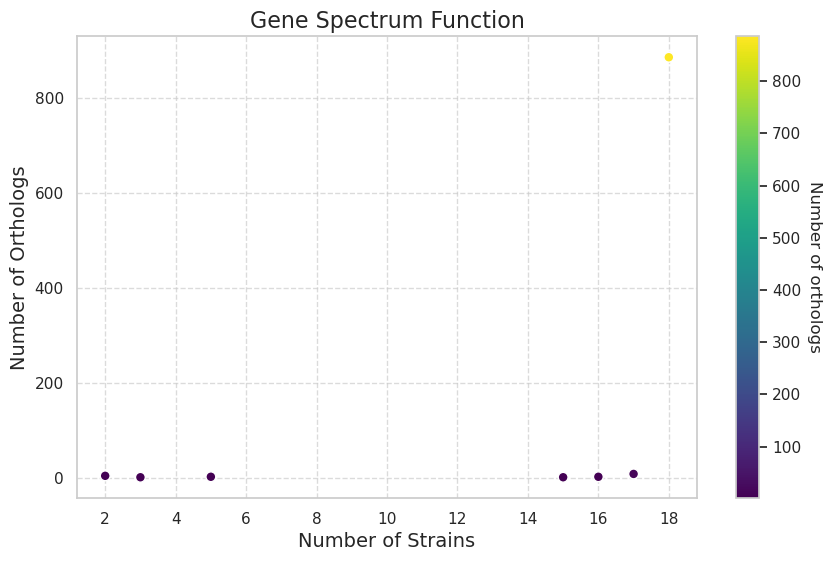

In [65]:
import seaborn as sns

# Use Seaborn style
sns.set(style="whitegrid")

# Sort dictionary items by key to get coordinates 
coords = sorted(strain_counts.items())  

# Unpack coordinates into separate lists
x_coords, y_coords = zip(*coords)

# Plot scatter plot  
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_coords, y_coords, c=y_coords, cmap='viridis', edgecolors='w', s=50)

# Add colorbar for better interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Number of orthologs', rotation=270, labelpad=15)

# Add plot labels and title
plt.title("Gene Spectrum Function", fontsize=16) 
plt.xlabel("Number of Strains", fontsize=14)
plt.ylabel("Number of Orthologs", fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


## Аппроксимируем

In [66]:
x_data = np.array(x_coords)  # переводим в массивы так как дальше работаем с нампаем
y_data = np.array(y_coords)

# формула суммы трёх экспонент
def func_exp(x, a1, b1, a2, b2, a3, b3):
    return np.exp(x * a1 + b1) + \
           np.exp(x * a2 + b2) +  \
           np.exp(x * a3 + b3)


# фомула суммы двух степенных функций
def func_pwr(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
           a2 * np.power(19 - x, b2)

def quality_metrics(array_observed,
                    array_predicted,
                    N_params):

    N_points = len(array_observed)
    if len(array_observed) != len(array_predicted):
        raise ValueError

    sse = sum((array_observed - array_predicted)**2)
    AIC = 2*N_params + N_points*np.log(sse)
    BIC = N_params*np.log(N_points) + N_points*np.log(sse)
    return {"AIC": AIC,
            "BIC": BIC,
            "SSE": sse,
            "RMSD": sse/N_points}


/tmp/ipykernel_2825451/3889935060.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x * a1 + b1) + \


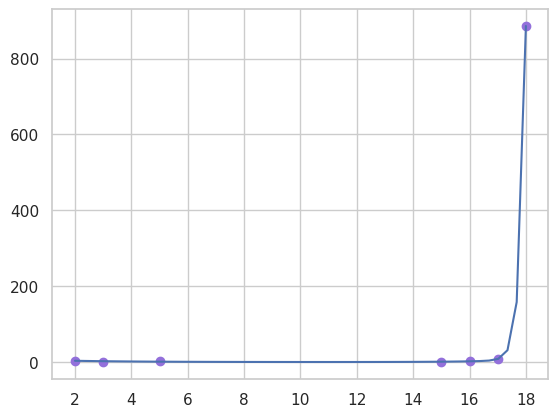

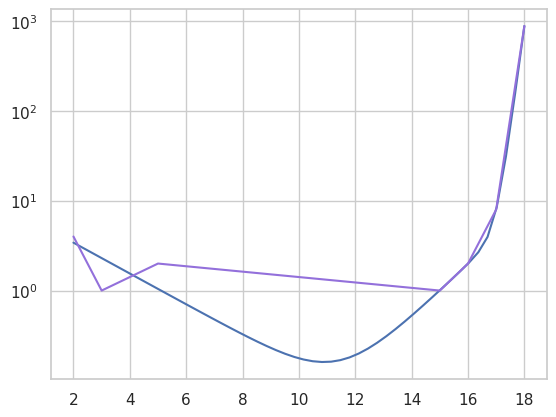

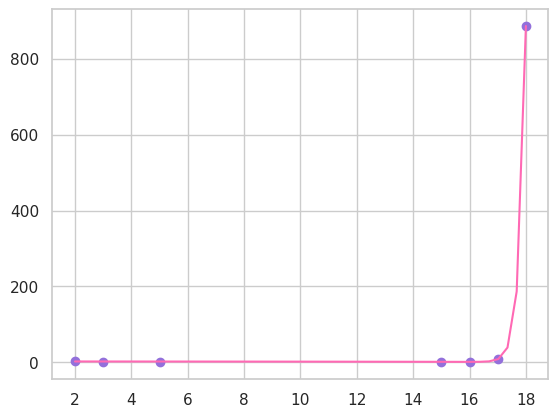

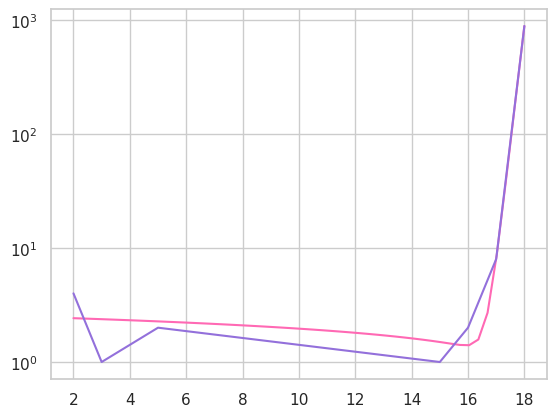

Quality Metrics for Exponential Fit:  {'AIC': 19.563541109022754, 'BIC': 19.239002003354635, 'SSE': 2.946169560958196, 'RMSD': 0.42088136585117086}

Quality Metrics for Power Fit:  {'AIC': 19.345728323129322, 'BIC': 19.129368919350576, 'SSE': 5.05722711384597, 'RMSD': 0.7224610162637101}


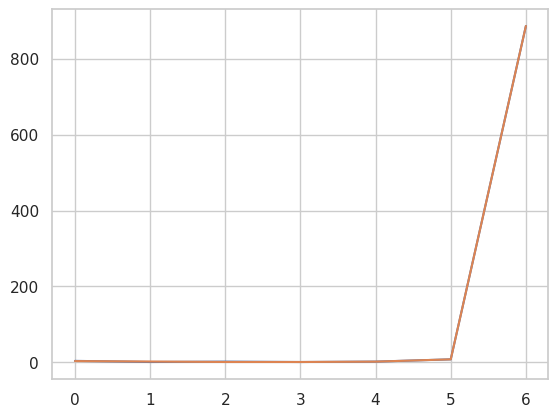

[  4   1   2   1   2   8 886]
[3.41653940e+00 3.00246555e+00 2.63859420e+00 2.31884333e+00
 2.03786889e+00 1.79097554e+00 1.57403830e+00 1.38343368e+00
 1.21597930e+00 1.06888088e+00 9.39685827e-01 8.26242514e-01
 7.26664783e-01 6.39300913e-01 5.62706673e-01 4.95622003e-01
 4.36950988e-01 3.85744831e-01 3.41187614e-01 3.02584691e-01
 2.69353618e-01 2.41017602e-01 2.17201515e-01 1.97630608e-01
 1.82132170e-01 1.70640450e-01 1.63205346e-01 1.60005483e-01
 1.61366525e-01 1.67785808e-01 1.79964663e-01 1.98850202e-01
 2.25688763e-01 2.62093843e-01 3.10132001e-01 3.72431186e-01
 4.52317044e-01 5.53984332e-01 6.82713107e-01 8.45146241e-01
 1.04967436e+00 1.30713275e+00 1.63291432e+00 2.05677789e+00
 2.67649750e+00 3.96396158e+00 8.52836057e+00 3.12936694e+01
 1.58271774e+02 8.86000000e+02]
2 4
3 1
5 2
15 1
16 2
17 8
18 886


In [67]:
# аппроксимируем для экспоненты
x = x_data
y = y_data
p0 = [-1, 1000, -1, 1, 10, 1]
popt_exp, pcov = curve_fit(func_exp, x, y, None, maxfev=100000000)
# аппрокимируем для степенной функции
# подбираем параметры, чтобы органичить множество возможных подстановок
p0 = [-10, 1, 10, 10]
popt_pwr, pcov = curve_fit(func_pwr, x, y, None, maxfev=1000000000)
# находим координаты для аппроксимаций
x_app = np.linspace(min(x), max(x))
y_app_exp = func_exp(x_app, *popt_exp)
# рисуем
plt.plot(x_app, y_app_exp)
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_exp)
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# повторяем всё для степенной
x_app = np.linspace(min(x), max(x))
y_app_pwr = func_pwr(x_app, *popt_pwr)
# рисуем
plt.plot(x_app, y_app_pwr, color='hotpink')
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_pwr, color='hotpink')
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# смотрим, насколько наши аппроксимации отличаются от кривой
y_observed = y_data
y_predicted_exp = func_exp(x, *popt_exp)
y_predicted_pwr = func_pwr(x, *popt_pwr)
N_params_exp = len(popt_exp)
N_params_pwr = len(popt_pwr)

exp_metrics = quality_metrics(y_observed, y_predicted_exp, N_params_exp)
print("Quality Metrics for Exponential Fit: ", exp_metrics)

pwr_metrics = quality_metrics(y_observed, y_predicted_pwr, N_params_pwr)
print("\nQuality Metrics for Power Fit: ", pwr_metrics)

# смотрим на графике на разницу
plt.plot(y_observed)
plt.plot(y_predicted_exp)
plt.show()
print(y)
print(y_app_exp)
for k in sorted(strain_counts.keys()):
    print(k, strain_counts[k])

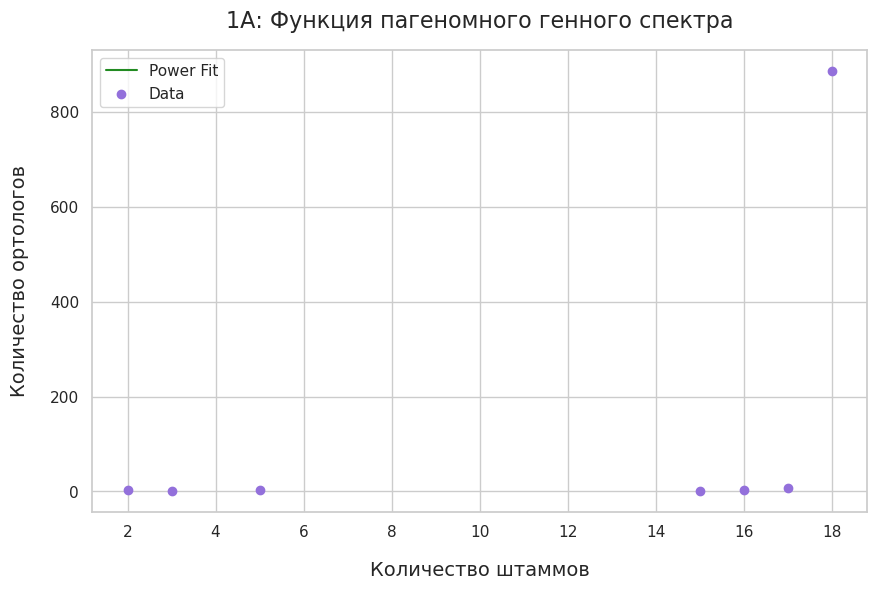

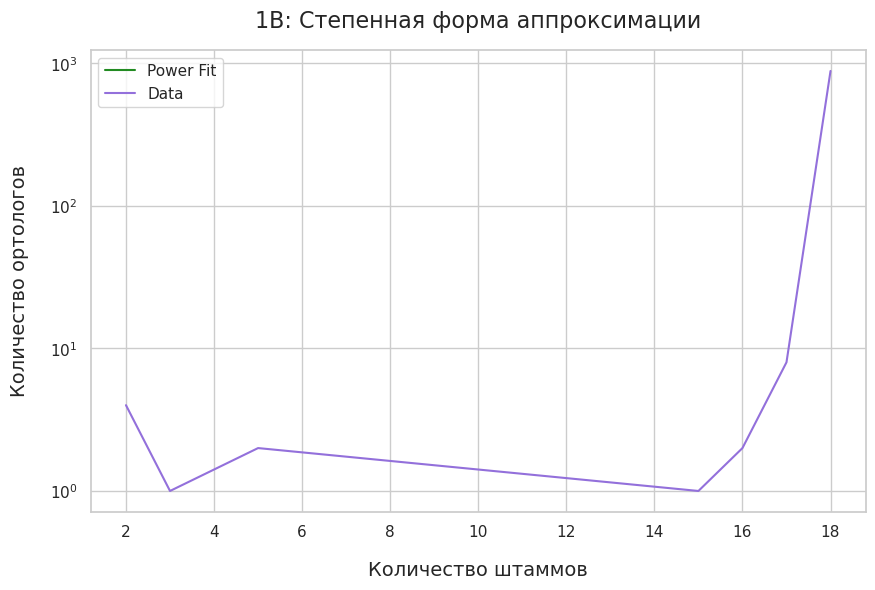

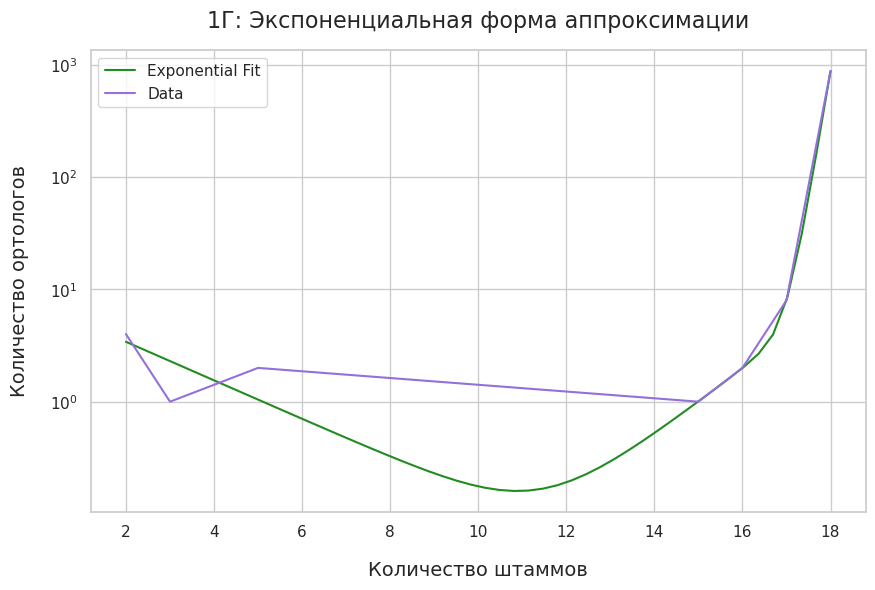

In [9]:
# Set Seaborn style
sns.set(style="whitegrid")

# Define color palette
colors = ['forestgreen', 'mediumpurple']

# Define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Power Fit
plt.plot(x_app, y_app_pwr, color=colors[0], label='Power Fit')
plt.scatter(x, y, color=colors[1], label='Data')
plt.title("1А: Функция пагеномного генного спектра", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.legend()
#plt.savefig('ris1a.pdf', bbox_inches='tight')
plt.show()

# Power Fit (Log Scale)
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogy(x_app, y_app_pwr, color=colors[0], label='Power Fit')
plt.semilogy(x, y, color=colors[1], label='Data')
plt.title("1В: Степенная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.legend()
#plt.savefig('ris1b.pdf', bbox_inches='tight')
plt.show()

# Exponential Fit (Log Scale)
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogy(x_app, y_app_exp, color=colors[0], label='Exponential Fit')
plt.semilogy(x, y, color=colors[1], label='Data')
plt.title("1Г: Экспоненциальная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.legend()
#plt.savefig('ris1c.pdf', bbox_inches='tight')
plt.show()


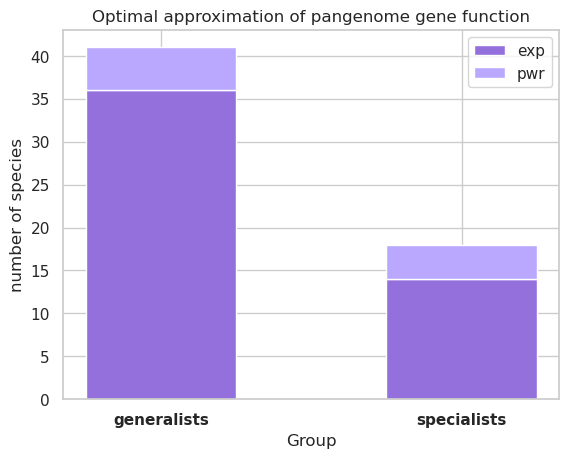

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Values of each group
bars2 = [5, 4]
bars1 = [36, 14]

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = [0, 1]

# Names of group and bar width
names = ['generalists', 'specialists']
barWidth = 0.5  # Reduced the width for aesthetic purposes

# Create purple bars
plt.bar(r, bars1, color='#9370db', edgecolor='white', width=barWidth, label='exp')
# Create lighter purple bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#baa8ff', edgecolor='white', width=barWidth, label='pwr')

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Group")

# Custom Y axis label
plt.ylabel("number of species")

# Set a title
plt.title("Optimal approximation of pangenome gene function")

# Add legend
plt.legend()

# Show graphic
plt.show()


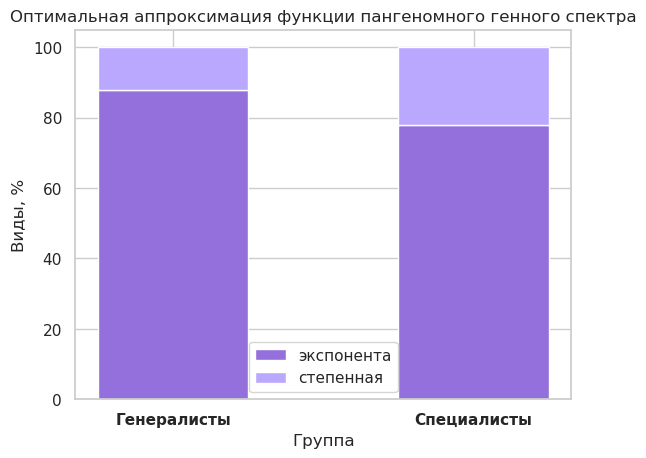

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Values of each group
bars2 = [12.2, 22.22]
bars1 = [87.8, 77.78]

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = [0, 1]

# Names of group and bar width
names = ['Генералисты', 'Специалисты']
barWidth = 0.5  # Reduced the width for aesthetic purposes

# Create purple bars
plt.bar(r, bars1, color='#9370db', edgecolor='white', width=barWidth, label='экспонента')
# Create lighter purple bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#baa8ff', edgecolor='white', width=barWidth, label='степенная')

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Группа")

# Custom Y axis label
plt.ylabel("Виды, %")

# Set a title
plt.title("Оптимальная аппроксимация функции пангеномного генного спектра")

# Add legend
plt.legend()

# Show graphic
plt.show()

In [68]:
#downsampling

# Load the data
df = pd.read_csv('species_aics.csv')

# Group by status (specialist or generalist)
specialists = df[df['status'] == 'specialist']
generalists = df[df['status'] == 'generalist']

# Number of generalist species
n_generalists = len(generalists)

# Function to calculate percentage of pwr approximation
def calculate_pwr_percentage(group):
    return len(group[group['approximation for all'] == 'pwr']) / len(group)

# List to store results of 100 replicas
replica_results = []

# Perform 100 replicas
for _ in range(100):
    # Downsample specialists to match the number of generalists
    downsampled_specialists = specialists.sample(n=n_generalists, replace=False)
    
    # Calculate pwr percentage for both groups
    pwr_percentage_specialists = calculate_pwr_percentage(downsampled_specialists)
    pwr_percentage_generalists = calculate_pwr_percentage(generalists)
    
    # Store the results
    replica_results.append((pwr_percentage_specialists, pwr_percentage_generalists))

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(replica_results, columns=['specialists_pwr_percentage', 'generalists_pwr_percentage'])

# Calculate the mean difference in pwr percentage
mean_difference = (results_df['specialists_pwr_percentage'] - results_df['generalists_pwr_percentage']).mean()

# Display the results
print(f"Mean difference in pwr percentage (specialists - generalists) over 100 replicas: {mean_difference:.4f}")

# Display the first few results for inspection
print(results_df.head())


Mean difference in pwr percentage (specialists - generalists) over 100 replicas: -0.0744
   specialists_pwr_percentage  generalists_pwr_percentage
0                    0.111111                    0.222222
1                    0.111111                    0.222222
2                    0.222222                    0.222222
3                    0.111111                    0.222222
4                    0.166667                    0.222222


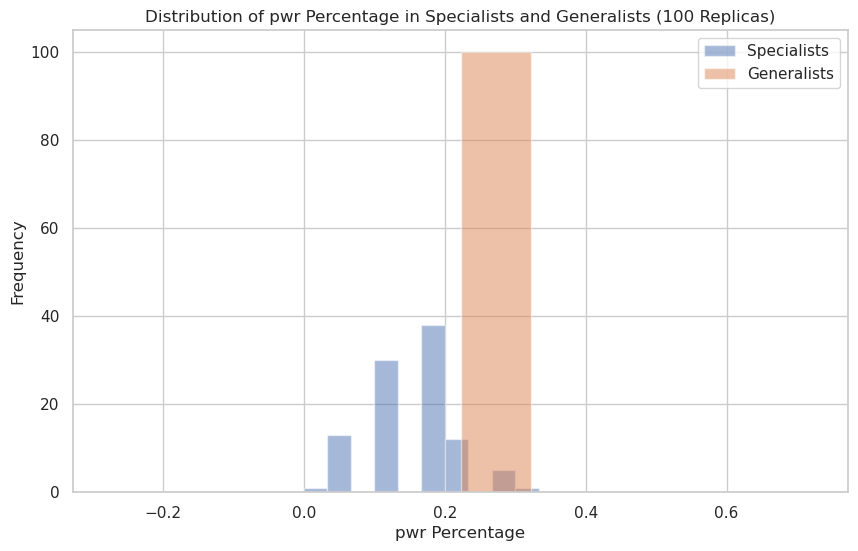

In [69]:
# Plot the distribution of pwr percentages for both groups
plt.figure(figsize=(10, 6))

plt.hist(results_df['specialists_pwr_percentage'], bins=10, alpha=0.5, label='Specialists')
plt.hist(results_df['generalists_pwr_percentage'], bins=10, alpha=0.5, label='Generalists')

plt.xlabel('pwr Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of pwr Percentage in Specialists and Generalists (100 Replicas)')
plt.show()

In [70]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_stat, p_value = ttest_rel(results_df['specialists_pwr_percentage'], results_df['generalists_pwr_percentage'])

print(f"Paired t-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


Paired t-test results: t-statistic = -12.1489, p-value = 0.0000


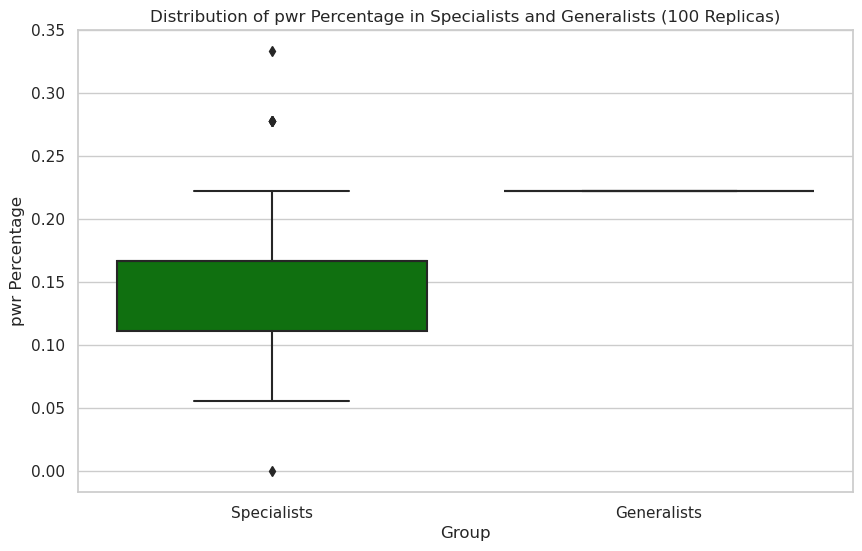

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for box plot
data = {
    'Group': ['Specialists'] * 100 + ['Generalists'] * 100,
    'pwr Percentage': results_df['specialists_pwr_percentage'].tolist() + results_df['generalists_pwr_percentage'].tolist()
}

# Convert to DataFrame
plot_df = pd.DataFrame(data)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='pwr Percentage', data=plot_df, palette=["green", "purple"])
plt.title('Distribution of pwr Percentage in Specialists and Generalists (100 Replicas)')
plt.ylabel('pwr Percentage')
plt.xlabel('Group')
plt.show()


In [12]:
data_species_aics = pd.read_csv('species_aics.csv')
data_species_aics

,species,ecosites_empo3_old,genomes_obtained,status,genomes,approximation for all,AIC exp,AIC power,AIC exp random10,AIC pwr random10,approximation random
0,Salinibacter ruber,"['Animal surface', 'Surface (non-saline)']",9,specialist,9,exp,75.4110,76.690,NaN,NaN,NaN
1,Candidatus Carsonella ruddii,"['Water (non-saline)', 'Animal surface']",9,specialist,9,exp,53.2970,63.073,NaN,NaN,NaN
2,Paenibacillus larvae,"['Animal corpus', 'Water (non-saline)', 'Anima...",9,specialist,9,pwr,100.2060,97.489,NaN,NaN,NaN
3,Bifidobacterium bifidum,['Plant rhizosphere'],10,specialist,10,exp,87.4200,87.900,NaN,NaN,NaN
4,Rhodopseudomonas palustris,['Water (non-saline)'],9,specialist,9,exp,90.5660,105.939,NaN,NaN,NaN
5,Staphylococcus simulans,"['Surface (non-saline)', 'Animal surface', 'An...",9,specialist,9,pwr,91.2710,86.797,NaN,NaN,NaN
6,Weissella cibaria,['Animal surface'],9,specialist,9,pwr,75.9000,72.280,NaN,NaN,NaN
7,Pantoea ananatis,['Animal secretion'],9,specialist,9,exp,68.1190,83.301,NaN,NaN,NaN
8,Lactobacillus salivarius,"['Animal proximal gut', 'Aerosol (non-saline)']",10,specialist,10,exp,67.5510,85.020,NaN,NaN,NaN
9,Lactobacillus johnsonii,['Animal secretion'],12,specialist,12,exp,88.8200,111.396,133.512,129.168,pwr


Text(0, 0.5, 'Средняя разница AIC')

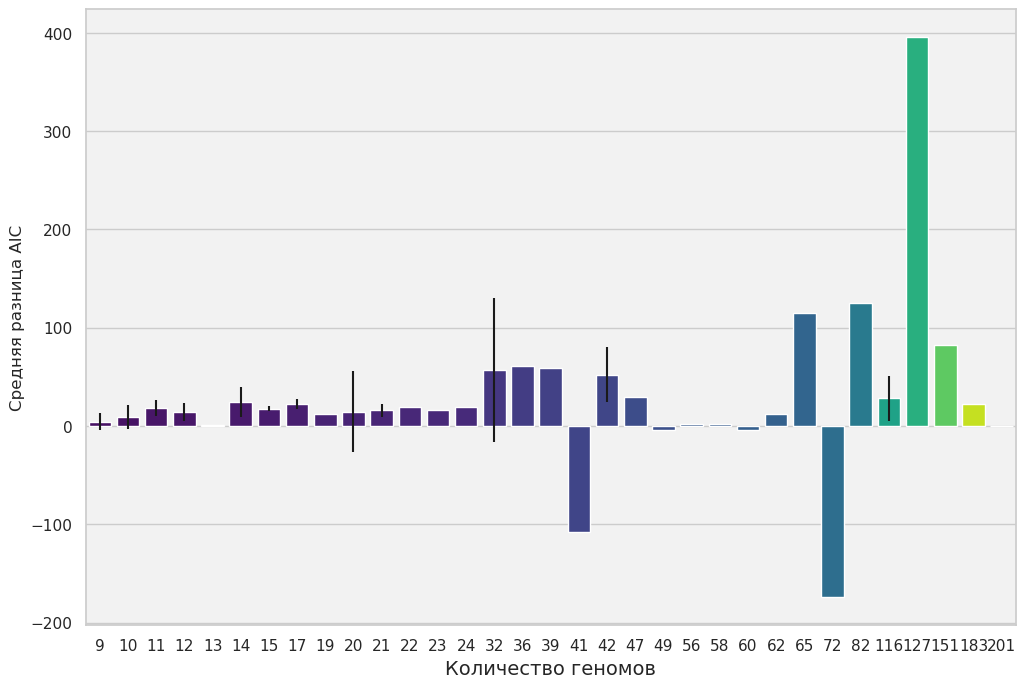

In [34]:
# Filter out rows with NaN values in the "AIC exp" and "AIC power" columns
data_filtered = data_species_aics.dropna(subset=['AIC exp', 'AIC power'])

# Calculate the difference between "AIC exp" and "AIC power"
data_filtered['AIC_diff'] = data_filtered['AIC power'] - data_filtered['AIC exp']

# Group by the number of genomes and calculate the average difference in AICs and standard deviation
average_diff_per_genome = data_filtered.groupby('genomes')['AIC_diff'].agg(['mean', 'std']).reset_index()

# Create the bar plot with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='genomes', y='mean', data=average_diff_per_genome, color='purple', yerr=average_diff_per_genome['std'])

# Add a gradient color based on the number of genomes
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
for bar, genome_count in zip(ax.patches, average_diff_per_genome['genomes']):
    bar.set_facecolor(plt.cm.viridis(genome_count / max(average_diff_per_genome['genomes'])))

# Set labels and title
plt.xlabel('Количество геномов', fontsize=14)
plt.ylabel('Средняя разница AIC')


In [14]:
data_species_genomesize = pd.read_csv('species_genomesize.csv')
data_species_genomesize

,species,ecosites_empo3_old,genomes_obtained,status,genomes,approximation for all,AIC exp,AIC power,AIC exp random10,AIC pwr random10,approximation random,"genome length, Mb"
0,Salinibacter ruber,"['Animal surface', 'Surface (non-saline)']",9,specialist,9,exp,75.4110,76.690,NaN,NaN,NaN,3.9020
1,Candidatus Carsonella ruddii,"['Water (non-saline)', 'Animal surface']",9,specialist,9,exp,53.2970,63.073,NaN,NaN,NaN,0.1662
2,Paenibacillus larvae,"['Animal corpus', 'Water (non-saline)', 'Anima...",9,specialist,9,pwr,100.2060,97.489,NaN,NaN,NaN,4.3780
3,Bifidobacterium bifidum,['Plant rhizosphere'],10,specialist,10,exp,87.4200,87.900,NaN,NaN,NaN,2.2160
4,Rhodopseudomonas palustris,['Water (non-saline)'],9,specialist,9,exp,90.5660,105.939,NaN,NaN,NaN,5.4570
5,Staphylococcus simulans,"['Surface (non-saline)', 'Animal surface', 'An...",9,specialist,9,pwr,91.2710,86.797,NaN,NaN,NaN,2.6820
6,Weissella cibaria,['Animal surface'],9,specialist,9,pwr,75.9000,72.280,NaN,NaN,NaN,2.3630
7,Pantoea ananatis,['Animal secretion'],9,specialist,9,exp,68.1190,83.301,NaN,NaN,NaN,4.8670
8,Lactobacillus salivarius,"['Animal proximal gut', 'Aerosol (non-saline)']",10,specialist,10,exp,67.5510,85.020,NaN,NaN,NaN,2.2560
9,Lactobacillus johnsonii,['Animal secretion'],12,specialist,12,exp,88.8200,111.396,133.512,129.168,pwr,1.9510


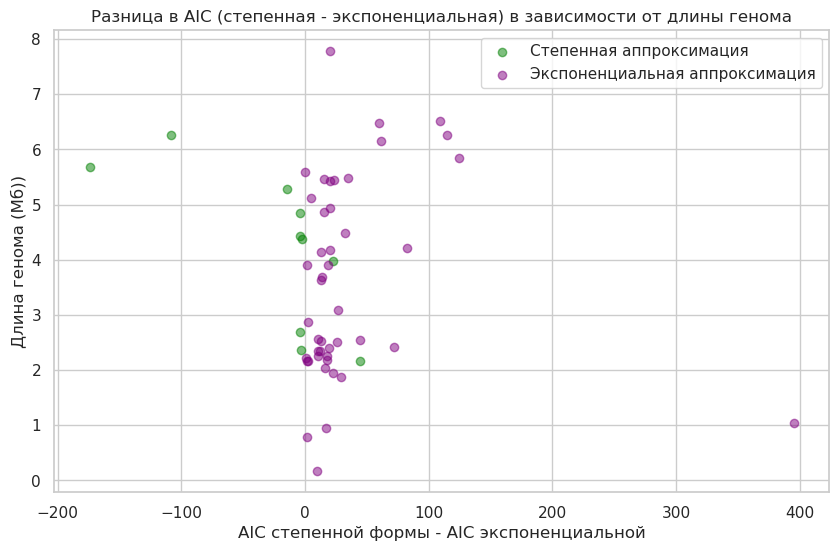

In [33]:
# Select relevant columns for visualization
selected_columns = ['AIC power', 'AIC exp', 'approximation for all', 'genome length, Mb']

# Drop rows with NaN values in selected columns
df_selected = data_species_genomesize[selected_columns].dropna()

# Convert 'genome length, Mb' column to numeric
df_selected['genome length, Mb'] = pd.to_numeric(df_selected['genome length, Mb'], errors='coerce')

# Calculate the difference in AIC between power and exponential functions
df_selected['AIC_difference'] = df_selected['AIC power'] - df_selected['AIC exp']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with 'AIC_difference' on x-axis and 'genome length, Mb' on y-axis
power_df = df_selected[df_selected['approximation for all'] == 'pwr']
exp_df = df_selected[df_selected['approximation for all'] == 'exp']

plt.scatter(power_df['AIC_difference'], power_df['genome length, Mb'], c='green', alpha=0.5, label='Степенная аппроксимация')
plt.scatter(exp_df['AIC_difference'], exp_df['genome length, Mb'], c='purple', alpha=0.5, label='Экспоненциальная аппроксимация')

plt.xlabel('AIC степенной формы - AIC экспоненциальной')
plt.ylabel('Длина генома (Мб))')
plt.title('Разница в AIC (степенная - экспоненциальная) в зависимости от длины генома')
plt.grid(True)
plt.legend()
plt.show()

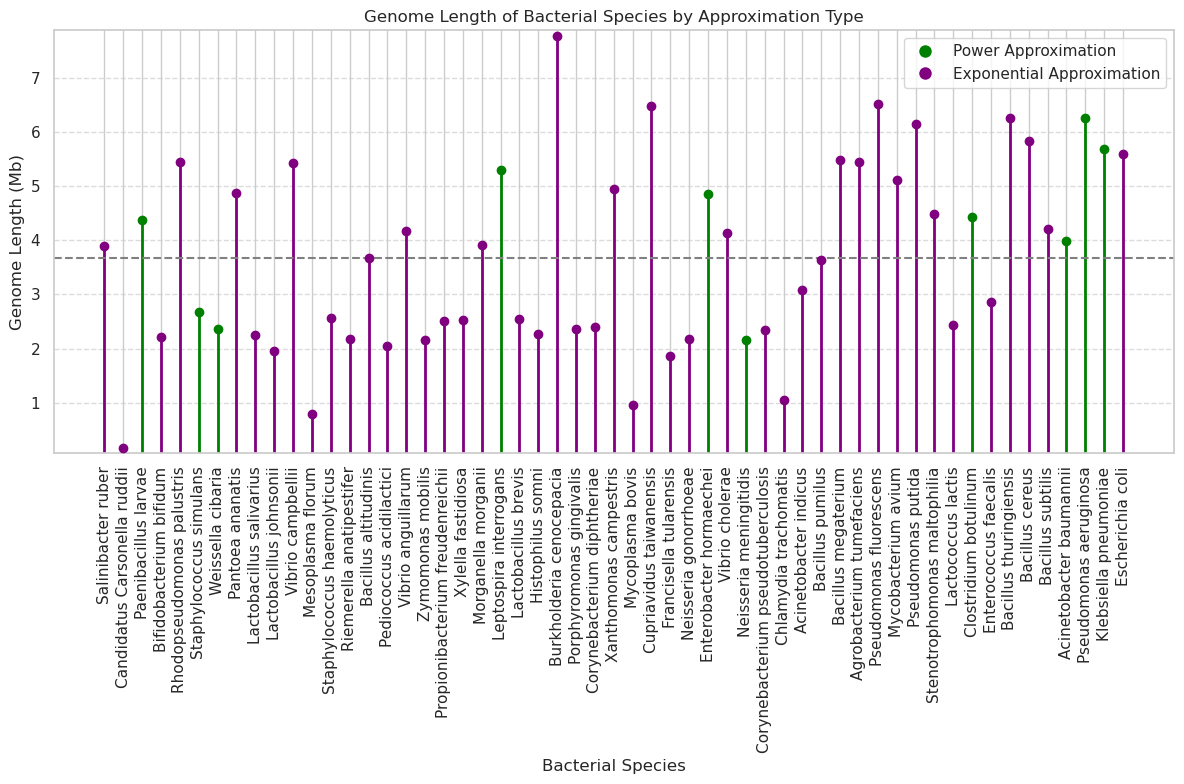

In [16]:

# Select relevant columns for visualization
selected_columns_lp = ['species', 'approximation for all', 'genome length, Mb']

# Drop rows with NaN values in selected columns
df_selected_lp = data_species_genomesize[selected_columns_lp].dropna()

# Set colors for different approximations
colors = {'pwr': 'green', 'exp': 'purple'}

# Calculate the median genome length
median_genome_length = df_selected_lp['genome length, Mb'].median()

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each row and plot lollipops
for index, row in df_selected_lp.iterrows():
    plt.plot([index, index], [0, row['genome length, Mb']], color=colors[row['approximation for all']], linewidth=2)
    plt.scatter(index, row['genome length, Mb'], color=colors[row['approximation for all']], zorder=5)

plt.xticks(range(len(df_selected_lp)), df_selected_lp['species'], rotation=90)
plt.xlabel('Bacterial Species')
plt.ylabel('Genome Length (Mb)')
plt.title('Genome Length of Bacterial Species by Approximation Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create legend with custom labels
legend_labels = ['Power Approximation', 'Exponential Approximation']
legend_colors = ['green', 'purple']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors],
           labels=legend_labels)

# Add a dotted line for the median genome length
plt.axhline(y=median_genome_length, color='grey', linestyle='--', label=f'Median: {median_genome_length:.2f} Mb')

plt.ylim(df_selected_lp['genome length, Mb'].min() - 0.1, df_selected_lp['genome length, Mb'].max() + 0.1)
plt.tight_layout()
plt.savefig('lolliplot.png')
plt.show()

In [17]:
median_genome_length

3.682

In [18]:
# Filter rows for power approximation
power_df = data_species_genomesize[data_species_genomesize['approximation for all'] == 'pwr']

# Calculate the average genome length for power approximation
average_genome_length_power = power_df['genome length, Mb'].mean()

print("Average genome length for power approximation:", average_genome_length_power)

Average genome length for power approximation: 4.208600000000001


In [19]:
# Filter rows for exp approximation
exp_df = data_species_genomesize[data_species_genomesize['approximation for all'] == 'exp']

# Calculate the average genome length for power approximation
average_genome_length_power = exp_df['genome length, Mb'].mean()

print("Average genome length for exponential approximation:", average_genome_length_power)

Average genome length for exponential approximation: 3.5816533333333336


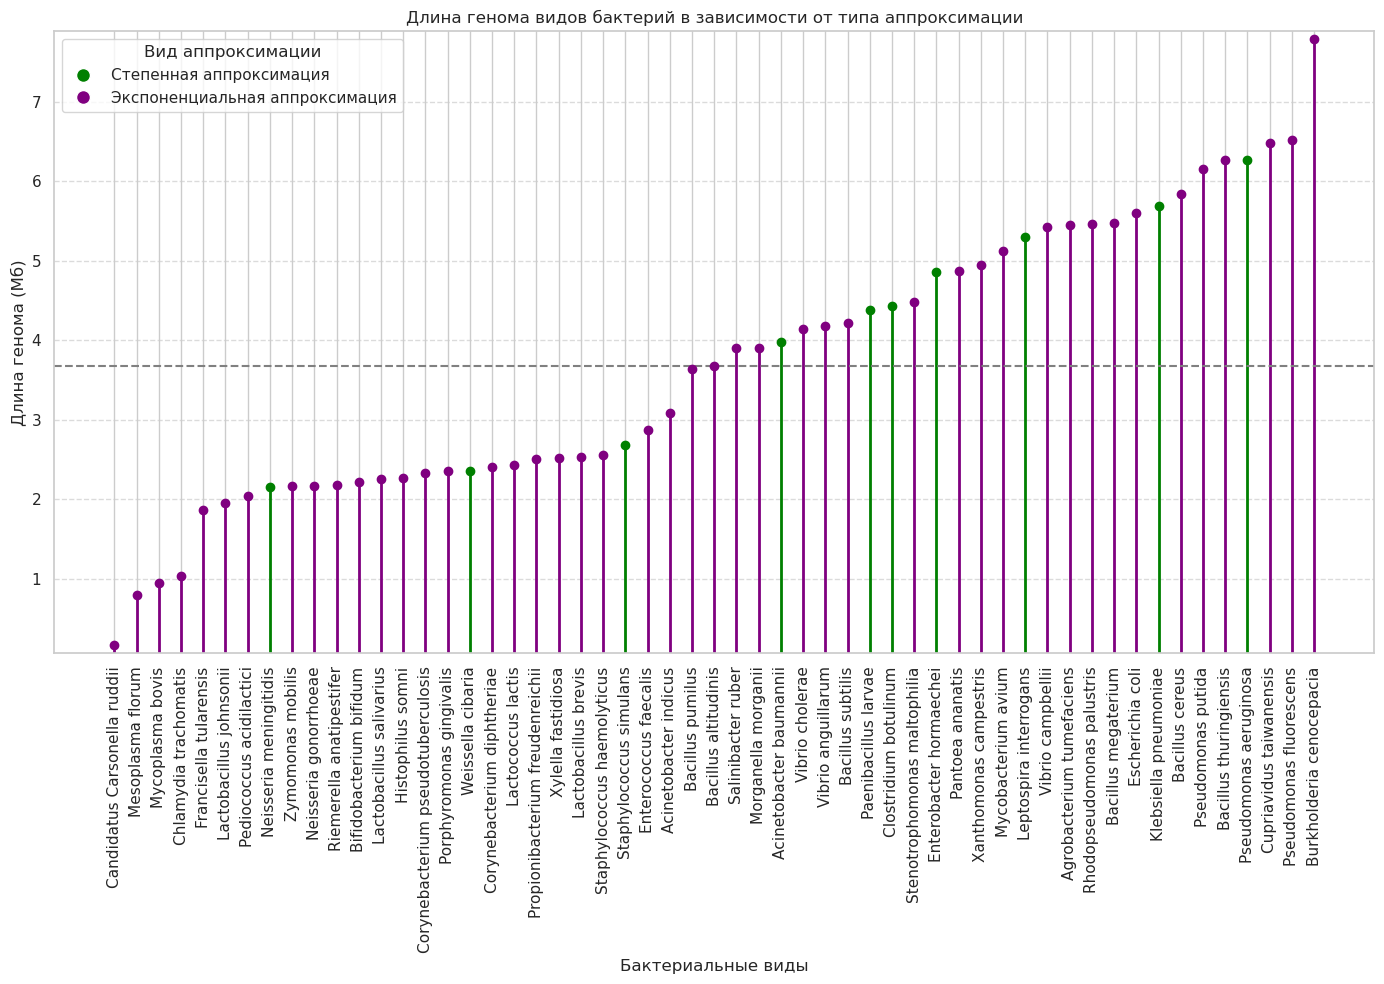

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('species_genomesize.csv')

# Select relevant columns for visualization
selected_columns = ['species', 'approximation for all', 'genome length, Mb']

# Drop rows with NaN values in selected columns
df_selected = df[selected_columns].dropna()

# Sort the DataFrame by genome length
df_sorted = df_selected.sort_values(by='genome length, Mb').reset_index(drop=True)

# Set colors for different approximations
colors = {'pwr': 'green', 'exp': 'purple'}

# Plotting
plt.figure(figsize=(14, 10))

# Plot lollipops
for index, row in df_sorted.iterrows():
    plt.plot([index, index], [0, row['genome length, Mb']], color=colors[row['approximation for all']], linewidth=2)
    plt.scatter(index, row['genome length, Mb'], color=colors[row['approximation for all']], zorder=5)

# Set x-ticks to species names and rotate them for better readability
plt.xticks(range(len(df_sorted)), df_sorted['species'], rotation=90)
plt.xlabel('Бактериальные виды')
plt.ylabel('Длина генома (Мб)')
plt.title('Длина генома видов бактерий в зависимости от типа аппроксимации')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
legend_labels = ['Степенная аппроксимация', 'Экспоненциальная аппроксимация']
legend_colors = ['green', 'purple']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors],
           labels=legend_labels, loc='upper left', title="Вид аппроксимации")

# Add a horizontal line for the median genome length
median_genome_length = df_sorted['genome length, Mb'].median()
plt.axhline(y=median_genome_length, color='grey', linestyle='--', label=f'Median Genome Length: {median_genome_length:.2f} Mb')

plt.ylim(df_sorted['genome length, Mb'].min() - 0.1, df_sorted['genome length, Mb'].max() + 0.1)
plt.tight_layout()
plt.savefig('lolliplot_sorted.png')
plt.show()


In [109]:
# функция, которая выбирает случайные штаммы из выдачи протеинорто
def func_pwr_r(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
           a2 * np.power(11 - x, b2)

def rand_strains(filename, numb_str):
    # читаем файл и строим таблицу, из которой будем вытаскивать
    df = pd.read_csv(filename, sep="\t", engine='python')
    df = df.drop(['# Species', 'Genes', 'Alg.-Conn.'], axis=1)
    df = df.T
    df = df.sample(n=numb_str)
    # вытаскиваем рандомные штаммы и считаем ортологи
    lst_r = []
    df = df.replace('*', np.nan)
    for column in df:
        count_nan = df[column].isnull().sum().sum()
        lst_r.append(count_nan)
    dic_r = Counter(lst_r)
    lists_r = sorted(dic_r.items())
    # создаём массивы-координаты У-кривой
    x_r, y_r = zip(*lists_r)
    x_data_r = np.array(x_r)
    y_data_r = np.array(y_r)
    popt_exp_r, pcov_r = curve_fit(func_exp, x_data_r, y_data_r, None, maxfev=100000)
    # аппроксимируем
    p0 = [-1, 1, -1, 1]
    popt_pwr_r, pcov_r = curve_fit(func_pwr_r, x_data_r, y_data_r, None, maxfev=100000)
    # формируем массивы с координатами для аппроксимаций
    x_app_r = np.linspace(min(x_data_r), max(x_data_r))
    y_app_exp_r = func_exp(x_app_r, *popt_exp_r)

    x_app_r = np.linspace(min(x_data_r), max(x_data_r))
    y_app_pwr_r = func_pwr_r(x_app_r, *popt_pwr_r)
    # считаем статистические характеристики
    y_observed_r = y_data_r
    y_predicted_exp_r = func_exp(x_data_r, *popt_exp_r)
    y_predicted_pwr_r = func_pwr_r(x_data_r, *popt_pwr_r)
    N_params_exp_r = len(popt_exp_r)
    N_params_pwr_r = len(popt_pwr_r)
    # смотрим, что получилось
    print('For power function: ',
          quality_metrics(y_data_r,
                          y_predicted_pwr_r,
                          N_params_pwr_r))
    print('For exp function: ',
          quality_metrics(y_data_r,
                          y_predicted_exp_r,
                          N_params_exp_r))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('species_genomesize.csv')

# Select relevant columns for visualization
selected_columns = ['species', 'approximation for all', 'genome length, Mb']

# Drop rows with NaN values in selected columns
df_selected = df[selected_columns].dropna()

# Sort the DataFrame by genome length
df_sorted = df_selected.sort_values(by='genome length, Mb')

# Set colors for different approximations
colors = {'pwr': 'green', 'exp': 'purple'}

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each row and plot lollipops
for index, row in df_sorted.iterrows():
    plt.plot([index, index], [0, row['genome length, Mb']], color=colors[row['approximation for all']], linewidth=2)
    plt.scatter(index, row['genome length, Mb']], color=colors[row['approximation for all']], zorder=5)

# Set x-ticks to species names and rotate them for better readability
plt.xticks(range(len(df_sorted)), df_sorted['species'], rotation=90)
plt.xlabel('Bacterial Species')
plt.ylabel('Genome Length (Mb)')
plt.title('Genome Length of Bacterial Species by Approximation Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
legend_labels = ['Power Approximation', 'Exponential Approximation']
legend_colors = ['green', 'purple']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors],
           labels=legend_labels, loc='upper right', title="Approximation Type")

# Add a horizontal line for the median genome length
median_genome_length = df_sorted['genome length, Mb'].median()
plt.axhline(y=median_genome_length, color='grey', linestyle='--', label=f'Median Genome Length: {median_genome_length:.2f} Mb')

plt.ylim(df_sorted['genome length, Mb'].min() - 0.1, df_sorted['genome length, Mb'].max() + 0.1)
plt.tight_layout()
plt.show()


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3878207861.py, line 25)

In [110]:
rand_strains(Burkholderia_cenocepacia_pan_50_path, numb_str=10)

For power function:  {'AIC': 139.08004966336392, 'BIC': 140.6716307545574, 'SSE': 149696.94327804312, 'RMSD': 13608.813025276648}
For exp function:  {'AIC': 144.03595292993876, 'BIC': 146.42332456672898, 'SSE': 163287.6173027501, 'RMSD': 14844.328845704555}


/tmp/ipykernel_3381572/1599579271.py:7: RuntimeWarning: overflow encountered in exp
  np.exp(x * a2 + b2) +  \
/tmp/ipykernel_3381572/1599579271.py:8: RuntimeWarning: overflow encountered in exp
  np.exp(x * a3 + b3)


In [114]:
columns = ['Species', 'AIC', 'BIC', 'SSE', 'RMSD']
data = []

bacteria_name = 'Burkholderia_cenocepacia'
results = rand_strains(Burkholderia_cenocepacia_pan_50_path, numb_str=10)

data.append([bacteria_name, 'Power', results['power_function']['AIC'], results['power_function']['BIC'],
             results['power_function']['SSE'], results['power_function']['RMSD']])
data.append([bacteria_name, 'Exp', results['exp_function']['AIC'], results['exp_function']['BIC'],
             results['exp_function']['SSE'], results['exp_function']['RMSD']])

# Создаем DataFrame
df_result = pd.DataFrame(data, columns=columns)

# Выводим результат
print(df_result)

For power function:  {'AIC': 158.24257716693148, 'BIC': 159.83415825812497, 'SSE': 854623.3342251889, 'RMSD': 77693.03038410809}
For exp function:  {'AIC': 162.50240817882676, 'BIC': 164.88977981561698, 'SSE': 875050.7005668548, 'RMSD': 79550.06368789589}


TypeError: 'NoneType' object is not subscriptable

In [59]:
def main(nw_file_name, proteinotho, 
         config, nmb_of_stains, iterat, up_bound, low_band):
  
    MyFile=open(str(nw_file), 'a+')
    headings = ['Number of random stains', 'Iteration number',
                'X coord', 'Y coord',
                'Exp params', 'Power params',
                'AIC, BIC, sse for power func',
                'AIC, BIC, sse for exp func', '/n']
    print(headings)
        
    for i in range(low_band, up_band):
        for k in range (iterations):
            some_list = []
            some_list.append(i)
            random_params = rand_strains(proteinortho, nmb_of_stains)
            some_list.append(k)
            some_list.append(random_params)
            some-list.append('/n')
            print(some_list)
    MyFile.close()


parser = OptionParser()
parser.add_option("-n", "--nw_file_name", help="New output file name")
parser.add_option("-p", "--proteinortho_file_name", help="Name of proteinorto")
parser.add_option("-c", "--config", help="Config file (FULL PATH: python)")
parser.add_option("-i", "--iterations", help="Number of iterations")
parser.add_option("-s", "--strains_numb", help="Needed strains number")
parser.add_option("-M", "--max_numb", help="Max strains number")
parser.add_option("-m", "--min_numb", help="Min stains number has to be >= 9")
parser.add_option("-d", "--out dir", help="Output directory")
opt, args = parser.parse_args()


Usage: ipykernel_launcher.py [options]

ipykernel_launcher.py: error: no such option: -f


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
main(opt.nw_file_name, opt.proteinortho,
     opt.config, opt.iterat, opt.up_bound, opt.low_band)